In [1]:
#all the imports required
from pathlib import Path
from PIL import Image
import matplotlib.pyplot as plt
import cv2
from numpy import asarray
import numpy as np
import sys
%matplotlib inline

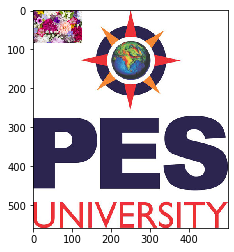

In [2]:
#shows the image (present in the same foulder as the ipynb file)
image = Image.open('test2.jpg')
plt.imshow(image)

In [3]:
#negative 
img = cv2.imread("test2.jpg")
cv2.imshow('image',img)
 
img_not = cv2.bitwise_not(img)
cv2.imshow('Invert1',img_not)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [4]:
#addition
img1 = cv2.imread('test2.jpg')
img2 = cv2.imread('flower.jpg')
img2_resized = cv2.resize(img2, (img1.shape[1], img1.shape[0]))
img = cv2.add(img1,img2_resized)

cv2.imshow('added',img)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [5]:
#subtraction
img = cv2.subtract(img1, img2_resized)
cv2.imshow('Subtraction',img)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [6]:
#flip
img = cv2.imread('test2.jpg')
img_flip_lr = cv2.flip(img, 1)
cv2.imshow('flip',img_flip_lr)
cv2.waitKey(0)
cv2.destroyAllWindows()

<PIL.Image.Image image mode=L size=500x559 at 0x2D655BFDE08>


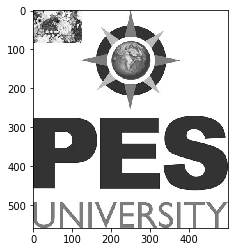

In [7]:
# convert image to grayscale
image = Image.open('test2.jpg')
image_grayscale = image.convert(mode='L')
print(image_grayscale)
# show grayscale image
plt.imshow(image_grayscale,cmap='Greys_r')


Text(0.5, 1.0, 'Blue Channel')

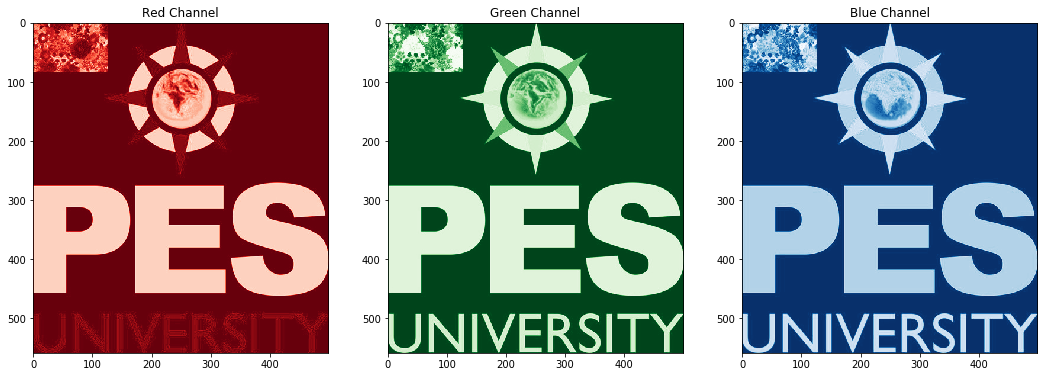

In [10]:
# split into separate channels
image = Image.open('test2.jpg')
red_channel, green_channel, blue_channel = image.split()

figure, (red, green, blue) = plt.subplots(ncols=3, figsize=(18, 8)) # figsize is (width, height) in inches

red.imshow(red_channel, cmap='Reds')
red.set_title("Red Channel")

green.imshow(green_channel, cmap='Greens')
green.set_title("Green Channel")

blue.imshow(blue_channel, cmap='Blues')
blue.set_title("Blue Channel")

In [11]:
#sepia
img = cv2.imread('test2.jpg')
original = img.copy()
img = np.array(img, dtype = np.float64)
img = cv2.transform(img, np.matrix([[ 0.393, 0.769, 0.189],
                                    [ 0.349, 0.686, 0.168],
                                    [ 0.272, 0.534, 0.131]]))
img[np.where(img>255)] = 255
img = np.array(img, dtype = np.uint8)
cv2.imshow("original", original)
cv2.imshow("Output", img)
cv2.waitKey(0)
cv2.destroyAllWindows() 

In [14]:
#increase brightness of the image
image = cv2.imread("test2.jpg")

new_image = np.zeros(image.shape, image.dtype)

brightness_value = int(input("Enter brightness value [0-100]: "))
contrast_value = float(1)

for y in range(image.shape[0]):
    for x in range(image.shape[1]):
        for c in range(image.shape[2]):
            new_image[y,x,c] = np.clip(contrast_value*image[y,x,c] + brightness_value, 0, 255)

cv2.imshow('image', image)

cv2.imshow('edited image', new_image)
print('Press any key..')
cv2.waitKey()
cv2.destroyAllWindows()

Enter brightness value [0-100]: 60
Press any key..


In [12]:
#to find svd decomposition of the given matrix
sepia= np.matrix([[ 0.393, 0.769, 0.189],[ 0.349, 0.686, 0.168],[ 0.272, 0.534, 0.131]])
U, s, V = np.linalg.svd(sepia)
print("U=\n",U,"\nE=\n",s,"\nV= \n", V)

U=
 [[-0.66290589  0.72817076 -0.17413537]
 [-0.59073405 -0.6515902  -0.4758818 ]
 [-0.45998812 -0.21259716  0.86209824]] 
E=
 [1.33358603e+00 1.13341607e-03 8.00525123e-05] 
V= 
 [[-0.44376962 -0.87032393 -0.21355276]
 [ 0.82908743 -0.48918211  0.27076722]
 [-0.34012138 -0.05689564  0.93865879]]


In [13]:
#Edge detection
img = cv2.imread('test2.jpg')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
img_gaussian = cv2.GaussianBlur(gray,(3,3),0)

#canny
img_canny = cv2.Canny(img,100,200)

#sobel
img_sobelx = cv2.Sobel(img_gaussian,cv2.CV_8U,1,0,ksize=5)
img_sobely = cv2.Sobel(img_gaussian,cv2.CV_8U,0,1,ksize=5)
img_sobel = img_sobelx + img_sobely


#prewitt
kernelx = np.array([[1,1,1],[0,0,0],[-1,-1,-1]])
kernely = np.array([[-1,0,1],[-1,0,1],[-1,0,1]])
img_prewittx = cv2.filter2D(img_gaussian, -1, kernelx)
img_prewitty = cv2.filter2D(img_gaussian, -1, kernely)


cv2.imshow("Original Image", img)
cv2.imshow("Canny", img_canny)
cv2.imshow("Sobel X", img_sobelx)
cv2.imshow("Sobel Y", img_sobely)
cv2.imshow("Sobel", img_sobel)
cv2.imshow("Prewitt X", img_prewittx)
cv2.imshow("Prewitt Y", img_prewitty)
cv2.imshow("Prewitt", img_prewittx + img_prewitty)


cv2.waitKey(0)
cv2.destroyAllWindows()

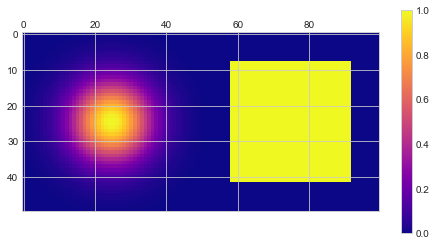

In [14]:
import scipy.ndimage
plt.style.use('seaborn-whitegrid')

x, y = np.meshgrid(np.linspace(-1, 1, 50), np.linspace(-1, 1, 50))
box = np.array(np.logical_and(np.abs(x) < 0.7, np.abs(y) < 0.7),dtype='float64') 
gauss = np.exp(-5 * (x * x + y * y))

plt.matshow(np.hstack((gauss, box)), cmap='plasma')
plt.colorbar()

In [15]:
def low_rank_approx(m, rank = 1):
    U,E,V = np.linalg.svd(m)
    mn = np.zeros_like(m)
    score = 0.0
    for i in range(rank):
        mn += E[i] * np.outer(U[:,i], V[i,:])
        score += E[i]
    print("Approximation Rank = ",rank)  
    print('Approximation percentage, ', score / np.sum(E))
    d = dict();  
    d['1'] = mn
    d['2']   =(score / np.sum(E))*100 
    return d

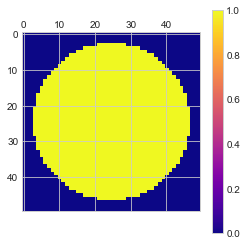

In [16]:
circle = np.array(x*x+y*y < 0.8, 'float32')
plt.matshow((circle), cmap='plasma')
plt.colorbar()

Approximation Rank =  1
Approximation percentage,  0.5077456846796441
Approximation Rank =  2
Approximation percentage,  0.6338679705482753
Approximation Rank =  3
Approximation percentage,  0.7031077478248521
Approximation Rank =  4
Approximation percentage,  0.755131353347003
Approximation Rank =  5
Approximation percentage,  0.7958858703496188
Approximation Rank =  6
Approximation percentage,  0.8315597477896394
Approximation Rank =  7
Approximation percentage,  0.8635487563173304
Approximation Rank =  8
Approximation percentage,  0.8899234379007881
Approximation Rank =  9
Approximation percentage,  0.9133582668034901


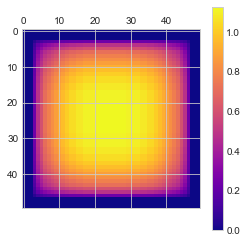

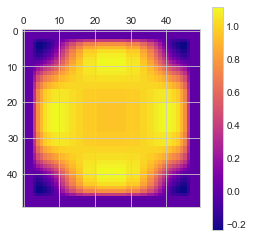

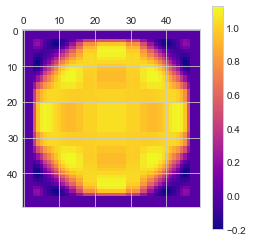

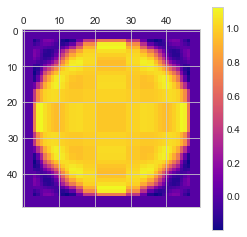

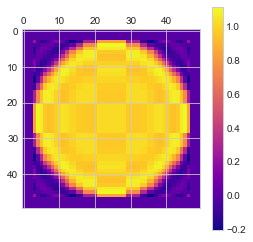

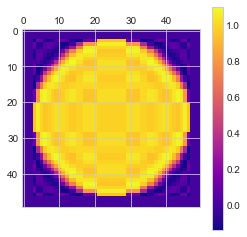

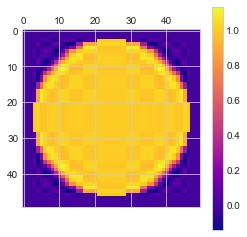

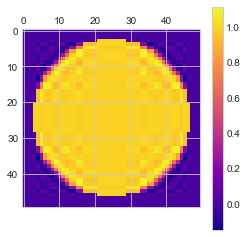

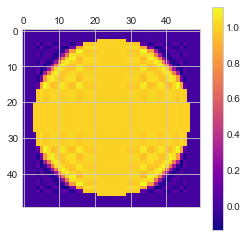

In [17]:
for i in range (1,10):
    a=low_rank_approx(circle,i)
    lc=a['1']
    perc=np.zeros(50)
    perc[i]=a['2']
    plt.matshow((lc), cmap='plasma')
    plt.colorbar()

In [18]:
#An application of seperable filters in cv2.GaussianBlur()

import cv2
import numpy as np

#Load source / input image 
imgIn = cv2.imread("test2.jpg")

# 1D Gausian Kernel using sigma of 1.7
kernel = cv2.getGaussianKernel( 11, 1.7 )

print (kernel.shape)
print(kernel)
gBlurImg = cv2.GaussianBlur(imgIn, (11,11), 1.7)
cv2.imshow("Gaussian Blur", gBlurImg)

#this is how the GaussianBlur function actually works:
twoD = cv2.sepFilter2D(imgIn, -1, kernel, kernel)
cv2.imshow("Gaussian sepFilter2D", twoD)

diff = twoD - gBlurImg

cv2.imshow("Difference", diff)
cv2.waitKey(0)
cv2.destroyAllWindows()

(11, 1)
[[0.00310794]
 [0.01474721]
 [0.04950763]
 [0.11758703]
 [0.1975931 ]
 [0.23491418]
 [0.1975931 ]
 [0.11758703]
 [0.04950763]
 [0.01474721]
 [0.00310794]]
